## Environment Setting

In [1]:
import pandas as pd
import nltk
from replacers import RegexpReplacer
from string import punctuation

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords

from collections import Counter

import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [2]:
nltk.download('averaged_perceptron_tagger')
nltk.download("gutenberg")
nltk.download('punkt')
nltk.download('reuters')
nltk.download("stopwords")
nltk.download("webtext")
nltk.download("wordnet")


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Chris\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\Chris\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Chris\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\Chris\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Chris\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package webtext to
[nltk_data]     C:\Users\Chris\AppData\Roaming\nltk_data...
[nltk_data]   Package webtext is already up-to-date!
[nl

True

## Load Data Set

In [3]:
df=pd.read_csv('C:/Users/Chris/Desktop/2018-1/Text Mining/project/walmart/walmartDF.csv',encoding='CP949')
df.columns
print(df.shape)

(719, 6)


Delete unnecessary columns

In [4]:
del df["Unnamed: 0"]
del df["no"]
del df["yes"]

In [5]:
df.columns

Index(['title', 'review', 'date'], dtype='object')

In [6]:
df.head()

,title,review,date
0,Google making hardware is a beautiful thing.,Amazing product. The accuracy recognizing what...,11/20/2016
1,Google Home is a great product for the family,I’ve had my Google Home for about 3 weeks and ...,11/26/2016
2,The Google Home Makes Life More Convenient,The Google Home is a well built voice activate...,11/6/2016
3,Google Home is fun,I ordered this because I had seen it advertise...,12/15/2016
4,This thing is pretty cool,It's pretty much like having the power of the ...,11/5/2016


Decomposite dataframe to list form

In [7]:
#list column "date"
date_list = df["date"].tolist()

#list column "title"
title_list = df["title"].tolist()

#list column "review"
review_list = df["review"].tolist()

## Pre-processing 

#### Pre-Processing for date type

Split date list as Year, Month, Day

In [8]:

Year = []
Month = []
Day = []

for row in date_list:

    year_date = row.split("/")[2]
    Year.append(year_date)
    
    month_date = row.split("/")[0]
    Month.append(month_date)
    
    day_date = row.split("/")[1]
    Day.append(day_date)
    


To avoid confusion with date data, replace Month data from number to character Ex) 1 -> Jan 

In [9]:
for i in range(len(Month)):
    if Month[i] == "1":
        Month[i] = "Jan" 
        
    if Month[i] == "2":
        Month[i] = "Feb" 
        
    if Month[i] == "3":
        Month[i] = "Mar" 
        
    if Month[i] == "4":
        Month[i] = "Apr" 
        
    if Month[i] == "5":
        Month[i] = "May" 
        
    if Month[i] == "6":
        Month[i] = "Jun" 
        
    if Month[i] == "7":
        Month[i] = "Jul" 
        
    if Month[i] == "8":
        Month[i] = "Aug" 
        
    if Month[i] == "9":
        Month[i] = "Sep" 
        
    if Month[i] == "10":
        Month[i] = "Oct" 
        
    if Month[i] == "11":
        Month[i] = "Nov" 
        
    if Month[i] == "12":
        Month[i] = "Dec" 


#### Pre-processing for title list

Transform to lowercase 

In [10]:

def lower_text(document):
    
    lower_list = []
    for row in document:
        if type(row) == str:
            lower_character = row.lower()
            lower_list.append(lower_character)
    return lower_list


In [11]:
lowercase = lower_text(title_list)

Lengthen all words with apostrophe Ex) I'm -> I am, can't -> can not 

In [12]:
def unset_apostrophe(lowercase):
    
    replacer = RegexpReplacer()
    
    unset_apostrophe_list = []
    
    for row in lowercase:
        temp_elem = replacer.replace(row)
        unset_apostrophe_list.append(temp_elem.replace('\'',''))

    return unset_apostrophe_list



In [13]:
apostrophe_removed = unset_apostrophe(lowercase)

Tokenize words removing punctuation at the same time

In [14]:
from nltk.tokenize import RegexpTokenizer

def tokenize(apostrophe_removed):
    
    t = RegexpTokenizer("[\w]+")
    tokenized_list = []

    for word in apostrophe_removed:
        tokens = t.tokenize(word)
        tokenized_list = tokenized_list + tokens
    
    return tokenized_list

In [15]:
tokenized_list = tokenize(apostrophe_removed)

To increase the accuracy of lemmatization, POS tagging of each tokenized words was conducted. 

POS tagging of tokenized words 

In [16]:
postagToken = nltk.pos_tag(tokenized_list)
postagToken

[('google', 'NN'),
 ('making', 'NN'),
 ('hardware', 'NN'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('beautiful', 'JJ'),
 ('thing', 'NN'),
 ('google', 'NN'),
 ('home', 'NN'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('great', 'JJ'),
 ('product', 'NN'),
 ('for', 'IN'),
 ('the', 'DT'),
 ('family', 'NN'),
 ('the', 'DT'),
 ('google', 'NN'),
 ('home', 'NN'),
 ('makes', 'VBZ'),
 ('life', 'NN'),
 ('more', 'RBR'),
 ('convenient', 'JJ'),
 ('google', 'NN'),
 ('home', 'NN'),
 ('is', 'VBZ'),
 ('fun', 'RB'),
 ('this', 'DT'),
 ('thing', 'NN'),
 ('is', 'VBZ'),
 ('pretty', 'JJ'),
 ('cool', 'JJ'),
 ('google', 'NN'),
 ('home', 'NN'),
 ('versus', 'NN'),
 ('amazon', 'NN'),
 ('is', 'VBZ'),
 ('echo', 'JJ'),
 ('google', 'NN'),
 ('home', 'NN'),
 ('has', 'VBZ'),
 ('a', 'DT'),
 ('long', 'JJ'),
 ('way', 'NN'),
 ('to', 'TO'),
 ('catch', 'VB'),
 ('up', 'RP'),
 ('to', 'TO'),
 ('alexa', 'VB'),
 ('great', 'JJ'),
 ('sound', 'JJ'),
 ('great', 'JJ'),
 ('price', 'NN'),
 ('go', 'VB'),
 ('google', 'NN'),
 ('do', 'VBP'),
 ('not', 'RB'),
 ('kno

Since lemmatization only uses 4 pos taggings(n,v,a,r), taggings needed to be changed.
Here "n, v, a, r" each states for noun, verb, adjective and adverb.
Therefore tags that started with N (NN, NNS, NNP, NNPS) would change to "n"

In [17]:
tagList = []

for i in range(len(postagToken)):
    if postagToken[i][1].startswith('N'):
        tagList.extend('n')
    elif postagToken[i][1].startswith('V'):
        tagList.extend('v')
    elif postagToken[i][1].startswith('J'):
        tagList.extend('a')
    elif postagToken[i][1].startswith('R'):
        tagList.extend('r')
    else:
        tagList.extend('q')

We conducted lemmatization by matching each word with taggings. Tags that were not "n,v,a,r" were considered q which didn't need any additional tagging. Since default tagging of WordNetLemmatizer is noun, words that were considered as q were regarded as noun. When tags were added to the lemmatization process, words were more accurately changed.

In [18]:
def lemmatization(before_lem_list):
    
    lm = WordNetLemmatizer()
    
    lemmatized_word = []
    
    for i in range(len(before_lem_list)):
        if tagList[i] == "q":
            lem_word= lm.lemmatize(before_lem_list[i])
            lemmatized_word.append(lem_word)
        else:
            lem_word = lm.lemmatize(before_lem_list[i], pos = tagList[i])
            lemmatized_word.append(lem_word)
        
    return lemmatized_word


Final words after pre-processing process

In [19]:
final_word = lemmatization(tokenized_list)
final_word

['google',
 'making',
 'hardware',
 'be',
 'a',
 'beautiful',
 'thing',
 'google',
 'home',
 'be',
 'a',
 'great',
 'product',
 'for',
 'the',
 'family',
 'the',
 'google',
 'home',
 'make',
 'life',
 'more',
 'convenient',
 'google',
 'home',
 'be',
 'fun',
 'this',
 'thing',
 'be',
 'pretty',
 'cool',
 'google',
 'home',
 'versus',
 'amazon',
 'be',
 'echo',
 'google',
 'home',
 'have',
 'a',
 'long',
 'way',
 'to',
 'catch',
 'up',
 'to',
 'alexa',
 'great',
 'sound',
 'great',
 'price',
 'go',
 'google',
 'do',
 'not',
 'know',
 'what',
 'i',
 'would',
 'do',
 'without',
 'my',
 'google',
 'home',
 'have',
 'have',
 'for',
 'a',
 'year',
 'now',
 'love',
 'still',
 'wait',
 'for',
 'some',
 'need',
 'update',
 'amazon',
 'echo',
 'blow',
 'this',
 'away',
 'i',
 'have',
 'both',
 'very',
 'good',
 'with',
 'only',
 'a',
 'few',
 'hiccup',
 'google',
 'home',
 'assistant',
 'side',
 'by',
 'side',
 'can',
 'not',
 'imagine',
 'life',
 'without',
 'this',
 'now',
 'do',
 'less',
 'th

Make a corpus

In [20]:
corpus = nltk.Text(final_word)

In [21]:
# returns number of tokens
print(len(corpus.tokens))     
# returns number of unique tokens
print(len(set(corpus.tokens)))  

2113
440


counts of each words

In [22]:
counts = Counter(final_word)
counts

Counter({'1': 1,
         '21st': 1,
         '2nd': 1,
         '3': 1,
         '4': 1,
         '8': 1,
         '911': 1,
         'a': 42,
         'about': 1,
         'absolutely': 1,
         'access': 2,
         'accessorie': 1,
         'accessory': 2,
         'activate': 1,
         'addition': 4,
         'adition': 1,
         'adjustment': 1,
         'adult': 1,
         'advertised': 2,
         'advertize': 2,
         'age': 2,
         'ahead': 1,
         'ai': 1,
         'alexa': 9,
         'all': 7,
         'almost': 2,
         'already': 1,
         'amaze': 10,
         'amazing': 4,
         'amazon': 9,
         'an': 3,
         'and': 26,
         'android': 1,
         'any': 1,
         'apart': 1,
         'app': 1,
         'arrive': 1,
         'as': 3,
         'ask': 3,
         'assistant': 8,
         'at': 1,
         'automation': 4,
         'away': 2,
         'awesome': 27,
         'awfully': 1,
         'ball': 1,
         'basic': 1,
 

Print most 10 common words and counts 

In [23]:
print(counts.most_common(10))

[('google', 155), ('home', 146), ('great', 108), ('it', 77), ('love', 57), ('product', 56), ('be', 51), ('fun', 43), ('a', 42), ('for', 38)]


cf. Chart for "frequency of words"

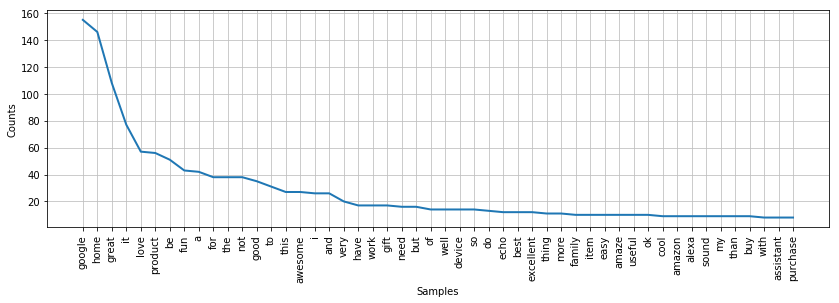

In [24]:
plt.figure(figsize=(14,4))
corpus.plot(50)

#### Pre-processing for review list

Following process for review list is same with title list

Transform to lowercase 

In [25]:
r_lowercase =lower_text(review_list)

Lengthen all words with apostrophe

In [26]:
def unset_apostrophe(lowercase):
    
    replacer = RegexpReplacer()
    
    unset_apostrophe_list = []
    
    for row in lowercase:
        temp_elem = replacer.replace(row)
        unset_apostrophe_list.append(temp_elem.replace('\'',''))
        

    return unset_apostrophe_list


In [27]:
r_apostrophe_removed = unset_apostrophe(r_lowercase)

Tokenize words removing punctuation at the same time

In [28]:
r_tokenized = tokenize(r_apostrophe_removed)

Removing stop words

In [29]:
stops = stopwords.words('english')
tokens = [word for word in r_tokenized if word not in stops]
print(len(tokens))

14876


POS tagging of tokenized words 

In [30]:
r_postagToken = nltk.pos_tag(tokens)

In [31]:
r_tagList = []

for i in range(len(r_postagToken)):
    if r_postagToken[i][1].startswith('N'):
        r_tagList.extend('n')
    elif r_postagToken[i][1].startswith('V'):
        r_tagList.extend('v')
    elif r_postagToken[i][1].startswith('J'):
        r_tagList.extend('a')
    elif r_postagToken[i][1].startswith('R'):
        r_tagList.extend('r')
    else:
        r_tagList.extend('q')

Lemmatization

In [32]:
def r_lemmatization(before_lem_list):
    
    lm = WordNetLemmatizer()
    
    lemmatized_word = []
    
    for i in range(len(before_lem_list)):
        if r_tagList[i] == "q":
            lem_word= lm.lemmatize(before_lem_list[i])
            lemmatized_word.append(lem_word)
        else:
            lem_word = lm.lemmatize(before_lem_list[i], pos = r_tagList[i])
            lemmatized_word.append(lem_word)
        
    return lemmatized_word


Final words after pre-processing process

In [33]:
review_final_word = r_lemmatization(r_tokenized)
review_final_word

IndexError: list index out of range

Make a corpus

In [ ]:
review_corpus = nltk.Text(review_final_word)

In [ ]:
# returns number of tokens
print(len(review_corpus.tokens))      
# returns number of unique tokens
print(len(set(review_corpus.tokens)))  

counts of each words

In [ ]:
review_counts = Counter(review_final_word)
review_counts

Print most 10 common words and counts 

In [ ]:
print(review_counts.most_common(10))

cf. Chart for "frequency of words"

In [ ]:
plt.figure(figsize=(14,4))
review_corpus.plot(50)

#### Stemming and stopwords(아직X)

In [ ]:
#Stemming
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import PorterStemmer


In [ ]:
def lan_stemming(lemmatized_word):
    
    st = LancasterStemmer()
    
    stemming_list = []
    
    for word in lemmatized_word:
        stem_word = st.stem(word)
        stemming_list.append(stem_word)
        
    return stemming_list

In [ ]:
#lan_stemming(lemmatized_word)

In [ ]:
def porter_stemming(before_stem_final_list):
    
    ps = PorterStemmer()
    
    stemming_word = []
    
    for stem_word in before_stem_final_list:
        after_stem = ps.stem(stem_word)
        stemming_word.append(after_stem)
    return stemming_word
        

In [ ]:
#porter_stemming(lemmatized_word)

In [ ]:
def remove_stopword(duplicate_list):
    
    english_stops = set(stopwords.words('english'))
    
    stopword_removed = duplicate_list.copy()
    
    for word in duplicate_list:
        if word in english_stops:
            stopword_removed.remove(word)
            
    return stopword_removed


In [ ]:
#remove_stopword(apostrophe_removed)